# Imports

In [1]:
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import clear_output
%matplotlib inline

/Users/JordanVani/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


# Functions

In [2]:
def ts_matrix(df, dur):
    """Create matrix of all cameras' mean time series.
    df - dataframe containing pedestrian counts.
    dur - time interval to resample (e.g., '1Min')."""
    
    ts = []
    # -- Sort time series' by mean value & return resampled time series.
    for idx, cam in enumerate(df.groupby("cam_id").mean().sort_values("count", ascending=False).index):
        print "Camera: {} ({}/{})".format(cam, idx, len(df.cam_id.unique()))
        clear_output(wait=True)
        ts.append(resample_min(df[df.cam_id == cam], cam, dur))
    return pd.concat(ts, axis=1).T

def resample_min(df, col_name, dur):
    """Calculate mean time series by time interval 'dur'.
    df - dataframe containing pedestrian counts.
    col_name - resulting column name.
    dur - time interval to resample (e.g., '1Min')."""
    
    temp = df.copy()
    temp.index = map(lambda x: pd.datetime.combine(datetime.datetime.today(), x),
                     temp["date"].dt.time)
    temp = temp.resample(dur, level=0).mean()[["count"]]
    temp.columns = [str(col_name)]
    return temp

def plot_ts_im(df, title, standardize=False, figsize=(14, 3)):
    if standardize:
        values = ((df.T - df.T.mean()) / df.T.std()).T.values
        cmin, cmax = -2, 2
    else:
        values = np.sqrt(df.T).T.values
        cmin, cmax = int(values.min().min()), int(values.max().max())
        
    fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=figsize)
    fig.tight_layout()
    ax1.grid(alpha=0.2)
    ax1.set_yticks([])
    ax1.set_xticklabels(range(24))
    ax1.set_xticks(np.arange(0, 1440, 60))
    ax1.set_xlabel("Hour", fontsize=13)
    ax1.yaxis.set_label_position("right")
    ax1.set_ylabel("Pedestrians (1min Average)", fontsize=13, labelpad=60)
    ax1.set_title(title, fontsize=16)
    ax1.tick_params(axis="both", which="both", labelsize=12)
    im = ax1.imshow(values, cmap="viridis", aspect="auto")
    im.set_clim(cmin, cmax)
    cbar = fig.colorbar(im, ax=ax1, pad=0.01)
    
    if not standardize:
        cbar.ax.set_yticklabels([np.square(float(x.get_text())) for x in cbar.ax.get_yticklabels()])

# Load Data

In [3]:
counts = pd.read_feather("../data/results/hadive-data.feather").set_index("date")
counts.head(2)

,cam_id,count
date,,
2017-06-27 20:09:22,368,1
2017-06-27 20:09:23,360,1


In [4]:
cams = pd.read_csv("../data/external/cameras.csv")
cams.head(2)

,cam_id,cctv_id,description,lat,long,people,ribbon,boro,zipcode
0,112,83,SIE @ Richmond Ave,40.614885,-74.157435,0,1,Staten Island,10314
1,121,129,LIE @ Kissena Blvd,40.738943,-73.815047,1,0,Queens,11367


In [5]:
df = counts[["cam_id", "count"]].reset_index() \
        .merge(cams[cams["people"] == 1.][["cam_id", "boro"]])
df.head(2)

,date,cam_id,count,boro
0,2017-06-27 20:09:22,368,1,Manhattan
1,2017-06-27 20:10:39,368,1,Manhattan


# Plot Time Series Images
## Manhattan Weekday

In [6]:
mh_weekday = ts_matrix(df[(df.boro == "Manhattan") &
                          (df.date.dt.weekday < 5)], "1Min")

Camera: 291 (156/157)


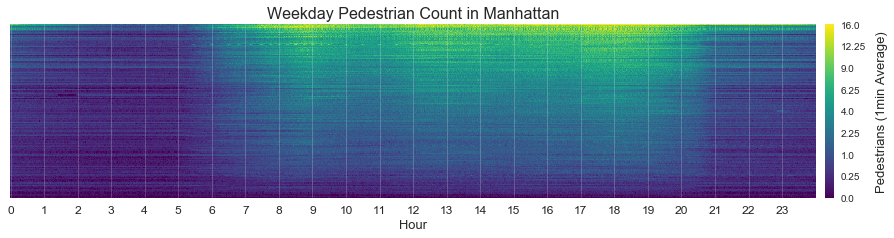

In [7]:
title = "Weekday Pedestrian Count in Manhattan"
plot_ts_im(mh_weekday, title)

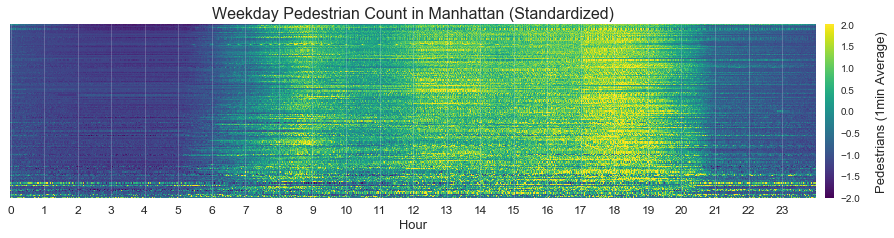

In [8]:
title = "Weekday Pedestrian Count in Manhattan (Standardized)"
plot_ts_im(mh_weekday, title, True)

## Manhattan Weekend

In [9]:
mh_weekend = ts_matrix(df[(df.boro == "Manhattan") &
                          (df.date.dt.weekday >= 5)], "1Min")

Camera: 291 (156/157)


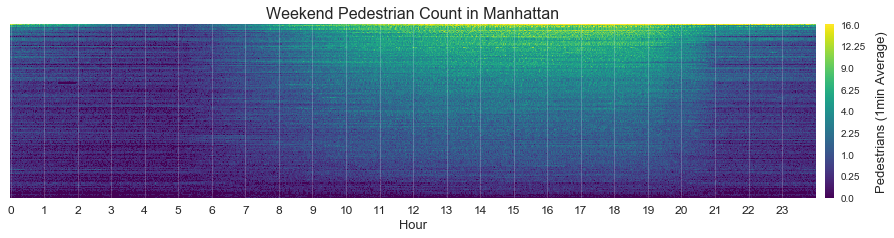

In [10]:
title = "Weekend Pedestrian Count in Manhattan"
plot_ts_im(mh_weekend, title)

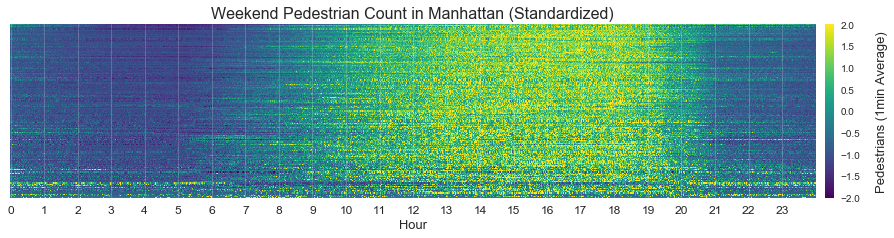

In [11]:
title = "Weekend Pedestrian Count in Manhattan (Standardized)"
plot_ts_im(mh_weekend, title, True)

## Brooklyn Weekday

In [12]:
bk_weekday = ts_matrix(df[(df.boro == "Brooklyn") &
                          (df.date.dt.weekday < 5)], "1Min")

Camera: 589 (29/30)


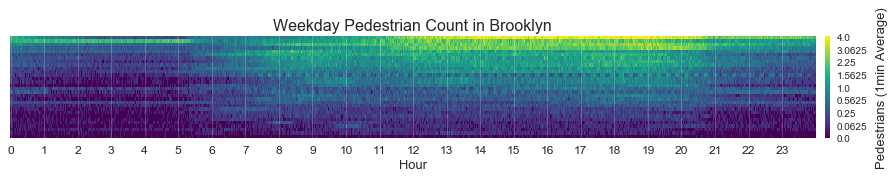

In [13]:
title = "Weekday Pedestrian Count in Brooklyn"
plot_ts_im(bk_weekday, title, figsize=(14, 2))

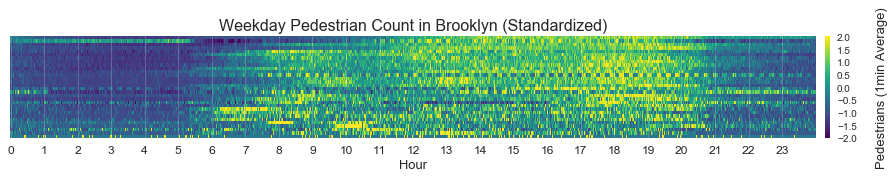

In [14]:
title = "Weekday Pedestrian Count in Brooklyn (Standardized)"
plot_ts_im(bk_weekday, title, True, figsize=(14, 2))

## Brooklyn Weekend

In [15]:
bk_weekend = ts_matrix(df[(df.boro == "Brooklyn") &
                          (df.date.dt.weekday >= 5)], "1Min")

Camera: 589 (29/30)


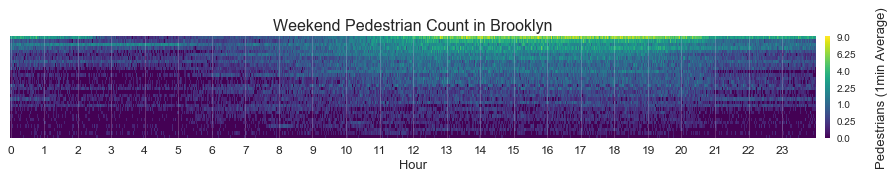

In [16]:
title = "Weekend Pedestrian Count in Brooklyn"
plot_ts_im(bk_weekend, title, figsize=(14, 2))

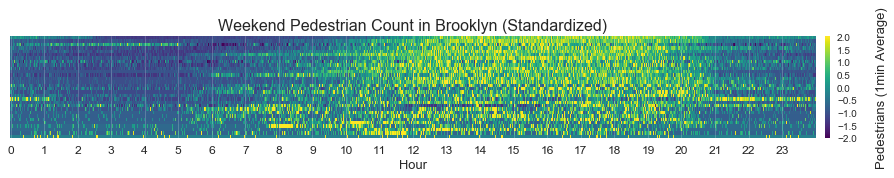

In [17]:
title = "Weekend Pedestrian Count in Brooklyn (Standardized)"
plot_ts_im(bk_weekend, title, True, figsize=(14, 2))

## Bronx Weekday

In [18]:
bx_weekday = ts_matrix(df[(df.boro == "Bronx") &
                          (df.date.dt.weekday < 5)], "1Min")

Camera: 1033 (12/13)


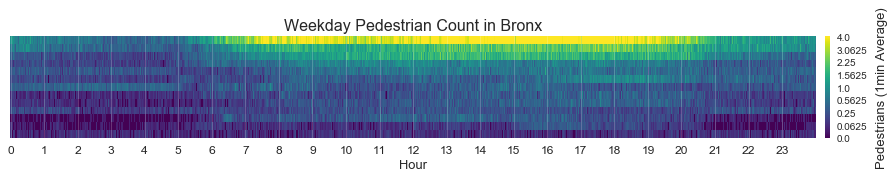

In [19]:
title = "Weekday Pedestrian Count in Bronx"
plot_ts_im(bx_weekday, title, figsize=(14, 2))

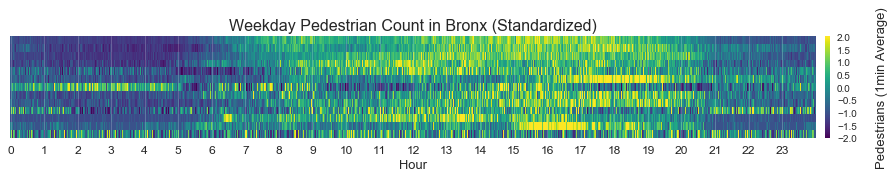

In [20]:
title = "Weekday Pedestrian Count in Bronx (Standardized)"
plot_ts_im(bx_weekday, title, True, figsize=(14, 2))

## Bronx Weekend

In [21]:
bx_weekend = ts_matrix(df[(df.boro == "Bronx") &
                          (df.date.dt.weekday >= 5)], "1Min")

Camera: 1033 (12/13)


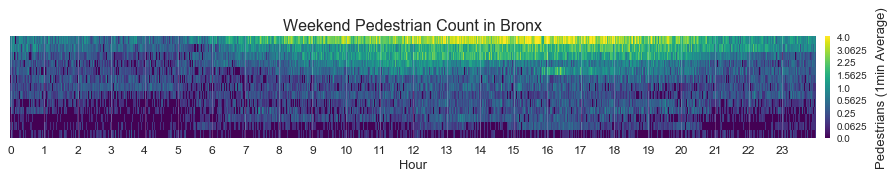

In [22]:
title = "Weekend Pedestrian Count in Bronx"
plot_ts_im(bx_weekend, title, figsize=(14, 2))

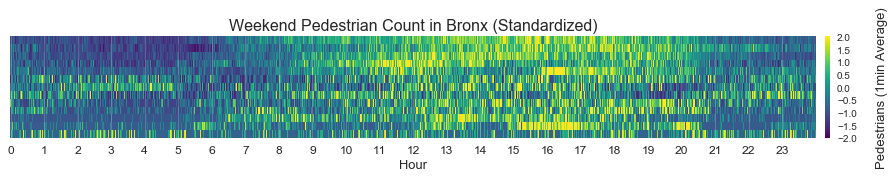

In [23]:
title = "Weekend Pedestrian Count in Bronx (Standardized)"
plot_ts_im(bx_weekend, title, True, figsize=(14, 2))

## Staten Island Weekday

In [24]:
si_weekday = ts_matrix(df[(df.boro == "Staten Island") &
                          (df.date.dt.weekday < 5)], "1Min")

Camera: 862 (10/11)


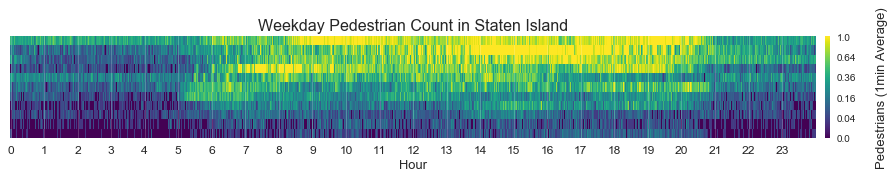

In [25]:
title = "Weekday Pedestrian Count in Staten Island"
plot_ts_im(si_weekday, title, figsize=(14, 2))

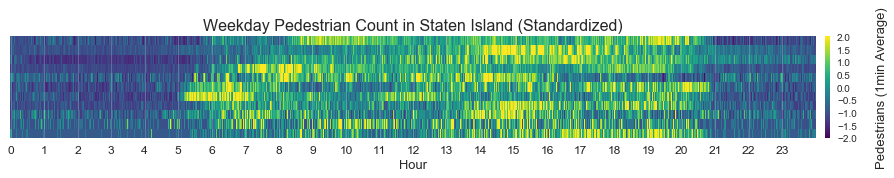

In [26]:
title = "Weekday Pedestrian Count in Staten Island (Standardized)"
plot_ts_im(si_weekday, title, True, figsize=(14, 2))

## Staten Island Weekend

In [27]:
si_weekend = ts_matrix(df[(df.boro == "Staten Island") &
                          (df.date.dt.weekday >= 5)], "1Min")

Camera: 861 (10/11)


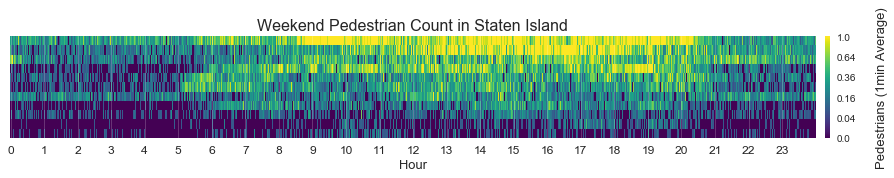

In [28]:
title = "Weekend Pedestrian Count in Staten Island"
plot_ts_im(si_weekend, title, figsize=(14, 2))

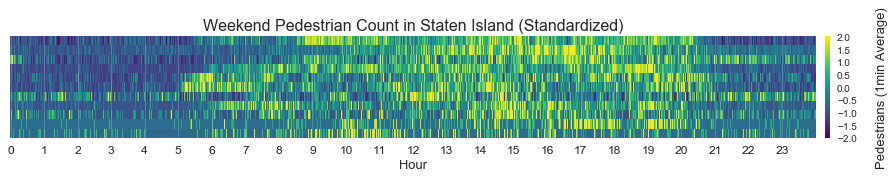

In [29]:
title = "Weekend Pedestrian Count in Staten Island (Standardized)"
plot_ts_im(si_weekend, title, True, figsize=(14, 2))